In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
path_1 = Path('/Users/oleseifert/Documents/Techlabs/SoSe-21-Team-10_Main/data/raw')
df = pd.read_csv(path_1.joinpath('2000-2002.csv'), index_col='date', parse_dates=True)

# Interpolate the data

In [3]:
df_intpol = df.interpolate(method='time')
df_intpol.dropna(how='any', inplace=True)

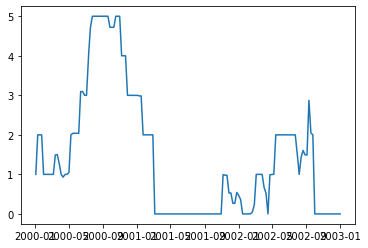

In [13]:
plt.plot(df_intpol.index, df_intpol.score)
plt.show()

# Check to see if the data is stationary

In [4]:
from statsmodels.tsa.stattools import adfuller

In [31]:
score_df = df_intpol.score

In [32]:
score_df_diff = score_df.diff().dropna()

In [38]:
# Check the 'original' data
adf_orig = adfuller(score_df)

In [39]:
print(adf_orig[0])
print(adf_orig[1])

-1.5700799194875923
0.4986036261301182


# Do differencing to make the data stationary

In [7]:
adf = adfuller(score_df_diff)

In [8]:
print(adf[0])
print(adf[1])

-5.668547321941218
9.033058726024413e-07


<AxesSubplot:xlabel='date'>

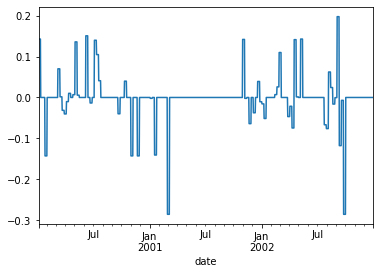

In [33]:
score_df_diff.plot()

In [22]:
from pmdarima import auto_arima
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
score_df_diff.head()

date
2000-01-05    0.142857
2000-01-06    0.142857
2000-01-07    0.142857
2000-01-08    0.142857
2000-01-09    0.142857
Name: score, dtype: float64

In [34]:
stepwise_fit = auto_arima(score_df_diff, trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-4611.478, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3149.329, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4609.703, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3926.562, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3151.049, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-4616.149, Time=0.37 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-4261.129, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-4613.028, Time=0.25 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-4617.089, Time=0.80 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-4517.750, Time=0.49 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-4596.330, Time=0.90 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-4697.849, Time=1.08 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-4513.869, Time=0.68 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-4691.498, Time=1.21 sec
 ARIMA(1,0,5)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1092
Model:               SARIMAX(3, 0, 5)   Log Likelihood                2455.914
Date:                Thu, 22 Jul 2021   AIC                          -4893.829
Time:                        18:13:08   BIC                          -4848.867
Sample:                             0   HQIC                         -4876.813
                               - 1092                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9584      0.065     14.819      0.000       0.832       1.085
ar.L2         -0.5968      0.099     -6.023      0.000      -0.791      -0.403
ar.L3          0.2212      0.059      3.736      0.000       0.105       0.337
ma.L1         -0.2251      0.062     -3.630      0.000      -0.347      -0.104
ma.L2          0.7851      0.051     15.420      0.000       0.685       0.885
ma.L3          0.2048      0.069      2.948      0.003       0.069       0.341
ma.L4          0.3737      0.038      9.892      0.000       0.300       0.448
ma.L5          0.5151      0.053      9.776      0.000       0.412       0.618
sigma2         0.0006   4.67e-06    119.883      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   2.94   Jarque-Bera (JB):             88212.74
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                            -2.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        46.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
from statsmodels.tsa.arima_model import ARIMA

# Split data into train and test set

In [36]:
score_df_diff.shape

(1092,)

In [37]:
train = score_df_diff.iloc[:764]
test = score_df_diff.iloc[764:]

In [38]:
model = ARIMA(score_df_diff, order=(3,0,5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  score   No. Observations:                 1092
Model:                     ARMA(3, 5)   Log Likelihood                2486.876
Method:                       css-mle   S.D. of innovations              0.025
Date:                Thu, 22 Jul 2021   AIC                          -4953.753
Time:                        18:13:39   BIC                          -4903.795
Sample:                    01-05-2000   HQIC                         -4934.847
                         - 12-31-2002                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0008      0.005     -0.166      0.868      -0.011       0.009
ar.L1.score     0.8781      0.034     25.675      0.000       0.811       0.945
ar.L2.score    -0.5949      0.042    -14.328      0.000      -0.676      -0.514
ar.L3.score     0.2630      0.033      8.091      0.000       0.199       0.327
ma.L1.score    -0.1306      0.021     -6.147      0.000      -0.172      -0.089
ma.L2.score     0.9076        nan        nan        nan         nan         nan
ma.L3.score     0.1691      0.026      6.513      0.000       0.118       0.220
ma.L4.score     0.4612      0.016     29.058      0.000       0.430       0.492
ma.L5.score     0.6715      0.001    597.654      0.000       0.669       0.674
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6399           -0.0000j            1.6399           -0.0000
AR.2            0.3111           -1.4906j            1.5227           -0.2173
AR.3            0.3111           +1.4906j            1.5227            0.2173
MA.1            0.6232           -0.7821j            1.0000           -0.1429
MA.2            0.6232           +0.7821j            1.0000            0.1429
MA.3           -0.2221           -0.9750j            1.0000           -0.2856
MA.4           -0.2221           +0.9750j            1.0000            0.2856
MA.5           -1.4890           -0.0000j            1.4890           -0.5000
-----------------------------------------------------------------------------
"""

In [39]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end=end, typ='levels')
print(pred)

2002-02-07   -0.000157
2002-02-08   -0.000043
2002-02-09   -0.000555
2002-02-10    0.000345
2002-02-11    0.000967
                ...   
2002-12-27   -0.000095
2002-12-28   -0.000487
2002-12-29    0.000243
2002-12-30    0.000728
2002-12-31   -0.000290
Freq: D, Length: 328, dtype: float64


<AxesSubplot:xlabel='date'>

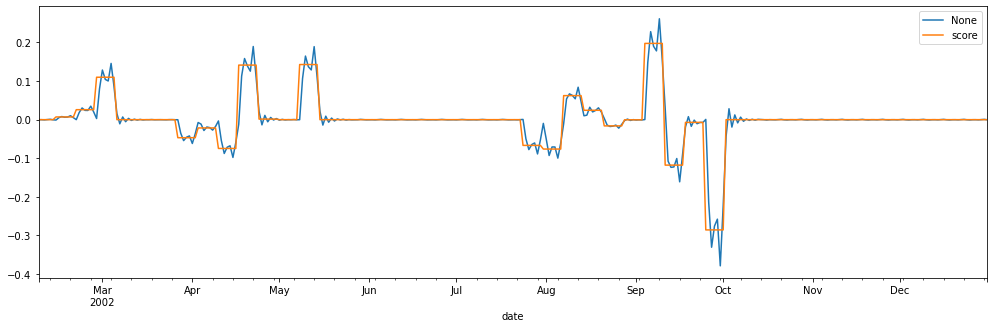

In [40]:
plt.figure(figsize=(17,5))
pred.plot(legend=True)
test.plot(legend=True)

# Trying to transform it back

In [41]:
normal_forecast = np.cumsum(pred)

In [45]:
diff_forecast = pred.predicted_mean

AttributeError: 'Series' object has no attribute 'predicted_mean'

<AxesSubplot:xlabel='date'>

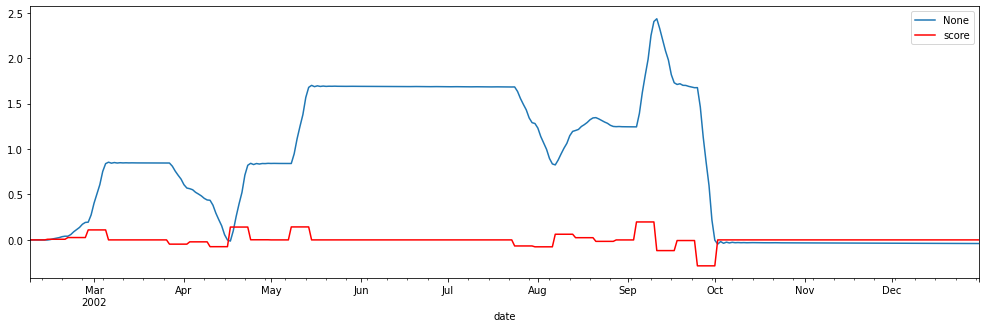

In [44]:
plt.figure(figsize=(17,5))
normal_forecast.plot(legend=True)
test.plot(legend=True, color='red')

# Trying the Arima model directly by setting d=1

In [18]:
score_df.shape

(1093,)

# Split the data into train and test

In [11]:
train_df = score_df.iloc[0:765]
test_df = score_df.iloc[765:]

# Fit the model

In [23]:
stepwise_fit = auto_arima(score_df, trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4611.478, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3149.329, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4609.703, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3926.562, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3151.049, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4616.149, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-4261.129, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4613.028, Time=0.59 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-4617.089, Time=0.85 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-4517.750, Time=0.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-4598.885, Time=1.02 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-4698.805, Time=1.17 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-4513.868, Time=0.75 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-4691.002, Time=1.32 sec
 ARIMA(1,1,5)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1093
Model:               SARIMAX(4, 1, 5)   Log Likelihood                2447.828
Date:                Thu, 22 Jul 2021   AIC                          -4875.655
Time:                        18:10:27   BIC                          -4825.698
Sample:                             0   HQIC                         -4856.749
                               - 1093                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8848      0.075     11.867      0.000       0.739       1.031
ar.L2         -0.5012      0.139     -3.604      0.000      -0.774      -0.229
ar.L3          0.0842      0.129      0.651      0.515      -0.169       0.337
ar.L4          0.1111      0.054      2.062      0.039       0.006       0.217
ma.L1         -0.1395      0.069     -2.034      0.042      -0.274      -0.005
ma.L2          0.6927      0.058     11.934      0.000       0.579       0.806
ma.L3          0.3378      0.079      4.262      0.000       0.182       0.493
ma.L4          0.3325      0.038      8.754      0.000       0.258       0.407
ma.L5          0.5515      0.052     10.606      0.000       0.450       0.653
sigma2         0.0007   7.13e-06     92.968      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):             82730.25
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                            -1.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        45.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
model_d = ARIMA(train_df, order=(4,1,5))
model_d = model_d.fit()
model_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.score   No. Observations:                  764
Model:                 ARIMA(4, 1, 5)   Log Likelihood                1829.036
Method:                       css-mle   S.D. of innovations              0.022
Date:                Thu, 22 Jul 2021   AIC                          -3636.072
Time:                        18:10:39   BIC                          -3585.048
Sample:                    01-05-2000   HQIC                         -3616.429
                         - 02-06-2002                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0011      0.005     -0.243      0.808      -0.010       0.008
ar.L1.D.score     1.0220      0.050     20.441      0.000       0.924       1.120
ar.L2.D.score    -0.8197      0.067    -12.176      0.000      -0.952      -0.688
ar.L3.D.score     0.5270      0.065      8.155      0.000       0.400       0.654
ar.L4.D.score    -0.2105      0.044     -4.785      0.000      -0.297      -0.124
ma.L1.D.score    -0.2123      0.039     -5.477      0.000      -0.288      -0.136
ma.L2.D.score     0.9510      0.031     31.044      0.000       0.891       1.011
ma.L3.D.score     0.0435      0.053      0.816      0.414      -0.061       0.148
ma.L4.D.score     0.4973      0.030     16.474      0.000       0.438       0.556
ma.L5.D.score     0.5579      0.037     15.228      0.000       0.486       0.630
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.0907           -1.4010j            1.4040           -0.2603
AR.2           -0.0907           +1.4010j            1.4040            0.2603
AR.3            1.3427           -0.7796j            1.5526           -0.0837
AR.4            1.3427           +0.7796j            1.5526            0.0837
MA.1            0.6329           -0.7912j            1.0132           -0.1426
MA.2            0.6329           +0.7912j            1.0132            0.1426
MA.3           -0.2226           -0.9850j            1.0099           -0.2854
MA.4           -0.2226           +0.9850j            1.0099            0.2854
MA.5           -1.7119           -0.0000j            1.7119           -0.5000
-----------------------------------------------------------------------------
"""

In [25]:
start = len(train_df)
end = len(train_df)+len(test_df)-1
prediction = model_d.predict(start=start, end=end, typ='levels')
print(prediction)

2002-02-07   -0.000589
2002-02-08   -0.000093
2002-02-09    0.000412
2002-02-10    0.001289
2002-02-11    0.002893
                ...   
2002-12-27   -0.358064
2002-12-28   -0.359199
2002-12-29   -0.360335
2002-12-30   -0.361470
2002-12-31   -0.362605
Freq: D, Length: 328, dtype: float64


<AxesSubplot:xlabel='date'>

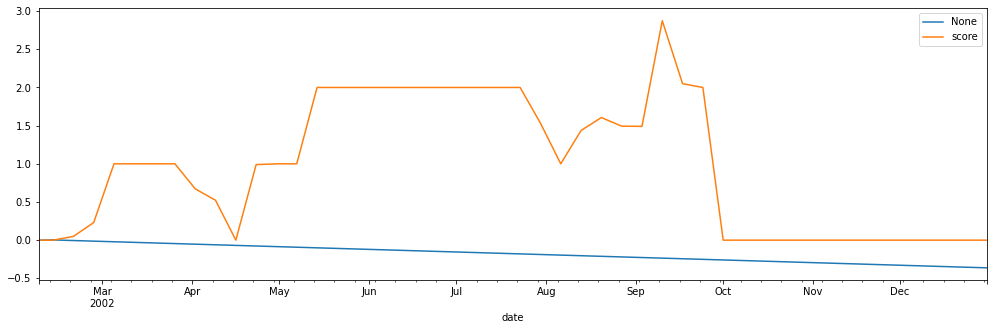

In [26]:
plt.figure(figsize=(17,5))
prediction.plot(legend=True)
test_df.plot(legend=True)